In [ ]:
import numpy as np  #does mathematical operation
import matplotlib.pyplot as plt #For plotting the graphs
import pandas as pd #making the data frames and import the csv files

In [ ]:
from google.colab import drive #to import the google drive data
drive.mount('/content/drive')   # to mount the drive data into the colab cloud and enter the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/LR_normal_equation_dataset" 

/content/drive/My Drive/Colab Notebooks/LR_normal_equation_dataset


In [ ]:
coloumnName = ['X','Y']
dataset = pd.read_csv("ex1data1.txt",names=coloumnName)
print(dataset)
dataset.shape   

          X         Y
0    6.1101  17.59200
1    5.5277   9.13020
2    8.5186  13.66200
3    7.0032  11.85400
4    5.8598   6.82330
..      ...       ...
92   5.8707   7.20290
93   5.3054   1.98690
94   8.2934   0.14454
95  13.3940   9.05510
96   5.4369   0.61705

[97 rows x 2 columns]


(97, 2)

In [ ]:
datasetdataframe =  pd.DataFrame(dataset)
datasetdataframe.describe()       #to check the mean median , max etc

,X,Y
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [ ]:
X_value = datasetdataframe.iloc[0:datasetdataframe.shape[0],0:1]
X_value

,X
0,6.1101
1,5.5277
2,8.5186
3,7.0032
4,5.8598
...,...
92,5.8707
93,5.3054
94,8.2934
95,13.3940


In [ ]:
Y_value = datasetdataframe.iloc[0:datasetdataframe.shape[0],1:2]
Y_value

,Y
0,17.59200
1,9.13020
2,13.66200
3,11.85400
4,6.82330
...,...
92,7.20290
93,1.98690
94,0.14454
95,9.05510


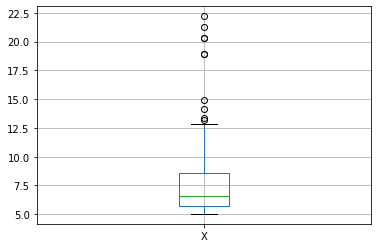

In [ ]:
#plotting the Box-plot fr x and y values
x_box_plot = X_value.boxplot(column=['X'])

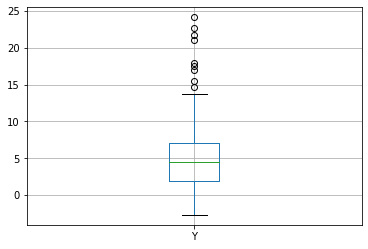

In [ ]:
#plotting the Box-plot fr x and y values
y_box_plot = Y_value.boxplot(column=['Y'])

In [ ]:
plt.scatter(X_value,Y_value)
plt.xticks(np.arange(4,20,step=2))
plt.yticks(np.arange(4,20,step=2))
plt.xlabel("x-value")
plt.ylabel("y-Value")
plt.title("Linear Regression 1st graph")

In [ ]:
X_values = X_value.values.reshape(X_value.size)
X_values

In [ ]:
Y_values = Y_value.values.reshape(Y_value.size)
Y_values

In [ ]:
X = np.array([np.ones(len(X_values)), X_values]).T     #x0 and x1 features
Y = (Y_values[:, np.newaxis])

In [ ]:
X

In [ ]:
Y

In [ ]:
theta_array = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)         #Normal Equation Formula and calculate the theta array
print(theta_array)

[[-3.89578088]
 [ 1.19303364]]


In [ ]:
theta_array[1][0]

1.1930336441895955

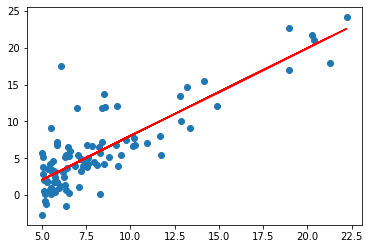

In [ ]:
y_new = X_values*theta_array[1][0]+theta_array[0][0]
plt.plot(X_values,y_new,'r')
plt.scatter(X_values,Y_values)
plt.show()

#Gradient Descent for the same dataset and the theta

In [ ]:
#defining the Hypothesis    : H(x) = theta0 + theta1*x

def hypothesis(theta_array,x):      #theta_array = [theta_array[0],theta_array[1]]
    return theta_array[0]+(theta_array[1]*x)

In [ ]:
#defining the cost funciton  : J(theta0,theta1) = 1/2m sum(1 to m)(h(x)-yi)^2

def cost_function(theta_array,x,y,m):   #x and y are list of observation.
    total_error = 0     #accumulate all the error
    for i in range(m):
        total_error+=(theta_array[0]+theta_array[1]*x[i] - y[i])**2

    return total_error/(2*m)

In [ ]:
def gradient_descent(theta_array,x,y,alpha,m):
    summation_theta0 = 0
    summation_theta1 = 0

    for i in range(m):
        summation_theta0+=((theta_array[0]+theta_array[1]*x[i]) - y[i])
        summation_theta1+=(((theta_array[0]+theta_array[1]*x[i]) - y[i])*x[i])

    new_theta0 = theta_array[0]-alpha*(summation_theta0/m)
    new_theta1 = theta_array[1]-alpha*(summation_theta1/m)

    updated_theta_array = [new_theta0,new_theta1]
    #print(updated_theta_array)
    return updated_theta_array

In [ ]:
def training(x,y,alpha,iters):
    theta_0 = 0
    theta_1 = 0
    theta_array = [theta_0,theta_1]

    m=x.size                #size of the data set or the number of observation
    cost_function_values = []
    for i in range(iters):
        theta_array = gradient_descent(theta_array,x,y,alpha,m)     #taking the new theta's
        cost_function_values.append(cost_function(theta_array,x,y,m))   #taking all the cost function values and storing
        '''
        if(i%6==0):
            y_new=x*theta_array[1]+theta_array[0]       #linear regression line
            plt.plot(x,y_new,'r')
            plt.scatter(x,y)
            plt.show()
        '''

    x=np.arange(0,len(cost_function_values),step=1)
    plt.plot(x,cost_function_values,"-b")
    plt.xlabel("number of iteration")
    plt.ylabel("Cost/loss values")
    plt.title("cost Function curve")
    plt.show()

    return theta_array

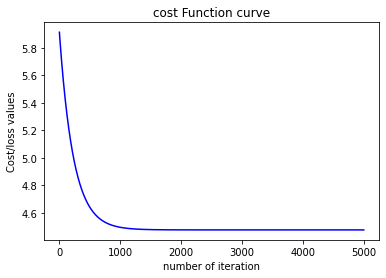

In [ ]:
alpha = 0.012
iteration = 5000
final_theta = training(X_values,Y_values,alpha,iteration)

In [ ]:
print(theta_array)      #normal equation theta
print(final_theta)      #gradient descent theta

[[-3.89578088]
 [ 1.19303364]]
[-3.895701963058936, 1.1930257162964586]
